In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [48]:
results = session.query(Measurement.date, Measurement.prcp).all()


# Precipitation Analysis

In [11]:
#Check elements of measurement data
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [12]:
#Get latest recorded date and calculate the last 12 months
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [13]:
# Query 12 month difference from previous date
twelve_months = dt.date(2017,8,23) - dt.timedelta(days=365)
twelve_months

datetime.date(2016, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data
precipitation_one_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= twelve_months).\
    order_by(Measurement.date).all()
precipitation_one_year


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_one_year)
precipitation_df.set_index('date', inplace=True)
precipitation_df.sort_values('date', ascending=True)
precipitation_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


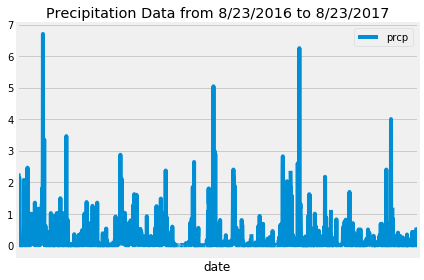

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot.line()
plt.xticks([])
plt.grid
plt.title('Precipitation Data from 8/23/2016 to 8/23/2017')
plt.tight_layout()
plt.show()

# Station Analysis

In [18]:
#Check elements of station data
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [19]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_list = session.query(Measurement.station, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
temp_station = session.query(*temp).\
    filter(Measurement.station == stations_list[0][0]).all()
temp_station


[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Query the latest date for the station with the highest number of temperature observations
latest_date_station = session.query(Measurement.date).\
     order_by(Measurement.date.desc()).\
     filter(Measurement.station == stations_list[0][0]).first()
latest_date_station

('2017-08-18')

In [23]:
# Query 12 month difference from previous date
twelve_months_station = dt.date(2017,8,18) - timedelta(days=365)
twelve_months_station

datetime.date(2016, 8, 18)

In [24]:
# Query the last 12 months of temperature observation data for the station 
# with the highest number of temperature observations
temp_observation_one_year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= twelve_months_station).\
    filter(Measurement.station == stations_list[0][0]).\
    order_by(Measurement.date).\
    group_by(Measurement.date).all()

temp_observation_one_year_df = pd.DataFrame(temp_observation_one_year, columns=['Date', 'Temperature'])
temp_observation_one_year_df.head()

,Date,Temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


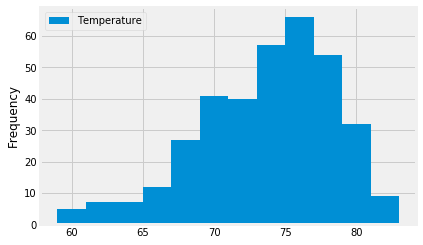

In [25]:
#Plot the results as a histogram
temp_observation_one_year_df.plot.hist(bins=12)
plt.xticks(np.arange(60, 85, step=5))
plt.grid
plt.show()

# Temperature Analysis

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [52]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation_start = '2017-07-11'
vacation_end = '2017-07-18'

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
vacation_temp = calc_temps(vacation_start, vacation_end)
print(vacation_temp)



[(72.0, 78.4423076923077, 83.0)]


In [81]:
#Create dataframe of previous query
vacation_temp_df = pd.DataFrame(vacation_temp, columns=['Min_Temp', 'Avg_Temp', 'Max_Temp'])
vacation_temp_df

,Min_Temp,Avg_Temp,Max_Temp
0,72.0,78.442308,83.0


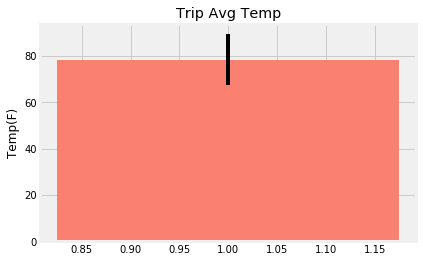

In [96]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
xpos = 1
yerr = vacation_temp_df.Max_Temp - vacation_temp_df.Min_Temp

vacation_temp_plot = plt.bar(xpos, vacation_temp_df.Avg_Temp, color='salmon', width=.35, yerr=yerr)
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.yticks(np.arange(0,100,20))
plt.show()

In [47]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
    
total_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= vacation_start).filter(Measurement.date <= vacation_end).\
        filter(Measurement.station == Station.station).\
        order_by((func.sum(Measurement.prcp)).desc()).\
        group_by(Station.station).all()
        
total_rainfall_df = pd.DataFrame(total_rainfall, columns=['Station', 'ID', 'Latitude', 'Longitude', 'Elevation', 'Total Rainfall'])
total_rainfall_df

,Station,ID,Latitude,Longitude,Elevation,Total Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.80
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.23
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.65
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.61
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.19
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.11
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00
